# My Programming for Data Analytics Project

**By Joanne Feeney**
***

For this project, I will:

- Analyse CO2 vs Temperature Anomaly from 800kyrs – present. 
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage).
- Examine Irish context e.g. Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect).
- Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats.
- For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).
- Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue.
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage).

Importing different packages that I will use in this notebook

In [53]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import math

Reading in data provided by the lecturer & skipping rows that are not required.

Composite (Co2) data:

In [2]:
# Naming as df1 and reading it into python
df1 = pd.read_csv("data\Temperature_data_from_NOAA_3.csv", skiprows=14)

Jouzel (temperature) data:

In [3]:
# Naming as df2 and reading it into python
df2 = pd.read_csv("data\Temperature_data_from_Jouzel.csv")

Luthi et. al. data already included as part of NOAA csv.

[1]

I begin comparing columns and seeing what information I require for this project. I can see from F.Parrenin et. al.'s paper [2], that EDC3 / yr BP and any other variations of this column name on the other datasets means years before AD1950 which clears things up for me.

In [4]:
# Dropping NaN columns in composite data (Geeksforgeeks)
df1.drop(['Unnamed: 3', 'Unnamed: 4','Unnamed: 5','Unnamed: 6', 'Unnamed: 7'], axis=1, inplace=True)

[3]

Using df1.info() to find out more information about the dataset. From this we can see there are 1901 entries and there are only float data types.

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gasage (yr BP)         1901 non-null   float64
 1   CO2 (ppmv)             1901 non-null   float64
 2   sigma mean CO2 (ppmv)  1901 non-null   float64
dtypes: float64(3)
memory usage: 44.7 KB


Using df1.describe() to see the maximum, minimum, mean etc. of each of the  variables.

In [6]:
df1.describe()

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
count,1901.000000,1901.000000,1901.000000
mean,242810.270447,235.566691,1.340284
std,274261.195334,35.902706,0.924241
min,-51.030000,173.710000,0.010000
25%,14606.210000,204.830000,0.640000
50%,74525.650000,232.460000,1.070000
75%,504177.190000,257.930000,1.800000
max,805668.870000,368.020000,9.960000


Using df.isnull().sum() to check if there are any null/NaN entries in the dataset.

In [7]:
df1.isnull().sum()

Gasage (yr BP)           0
CO2 (ppmv)               0
sigma mean CO2 (ppmv)    0
dtype: int64

Adding column names.

In [8]:
# Adding columns
df1.columns =['Years before AD1950', 'Co2 levels', 'Sigma mean of Co2']

By using all of the above quick python codes, we can already make some assumptions about the composite Co2 dataset. We can see that there are some columns with missing values, which we have dropped. Each of the three variables we require has a count of 1901. 

We only have one types of variable, floats. There are no null values in the three columns that we will be using for Co2.

Plotting the entire dataset Co2 history to compare levels in the atmosphere from 800,000 years ago to present day. Note that Co2 is measured in 'ppmv', meaning parts per million by volume.

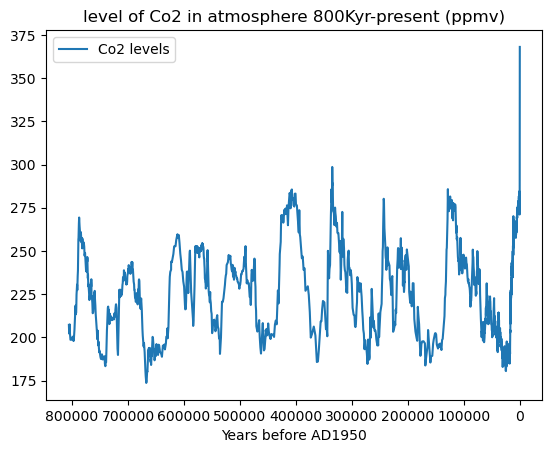

In [9]:
# Plotting all variables and inverting x axis (Stackoverflow.com)
df1.plot(x='Years before AD1950', y='Co2 levels', title='level of Co2 in atmosphere 800Kyr-present (ppmv)').invert_xaxis();

[4]

Taking a closer look at the last 50 years

In [10]:
# Creating a variable for recent years
df1_present = df1[0:62]

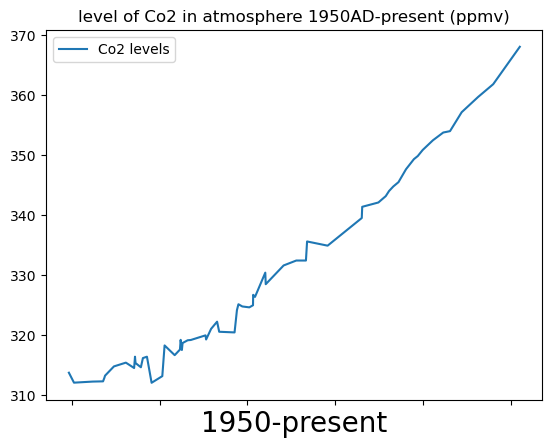

In [11]:
# Plotting from 1950 on and inverting x axis (Stackoverflow.com) (Pythonguides.com)
ax = df1_present.plot(x='Years before AD1950', y='Co2 levels', title='level of Co2 in atmosphere 1950AD-present (ppmv)').invert_xaxis();
plt.xlabel('1950-present', size=20);
plt.tick_params(axis='x', labelbottom=False)

[5]

From the above, we can see that the levels of Co2 in the atmosphere has significantly increased in comparison to any amount of time in the past 800,000 years. The highest Co2 levels we have previously seen on this planet according to this dataset sat at about the 300 mark roughly 330,000 years ago whereas between 1950-present day we have gone way over this maximum and are now sitting at roughly 375.

Now let's look at temperature data.

In [12]:
# Dropping columns data bar year and temperature (Geeksforgeeks)
df2.drop(['bag', 'ztop', 'AICC2012', 'deutfinal', 'acc-EDC3beta'], axis=1, inplace=True)

In [13]:
df2.head()

,EDC3béta,temp
0,-50.00000,218.3
1,-43.55977,218.3
2,-37.44019,218.3
3,-31.64156,218.3
4,-24.55278,218.3


In [14]:
# Adding columns
df2.columns =['Years before AD1950', 'Temperature (Kelvin)']

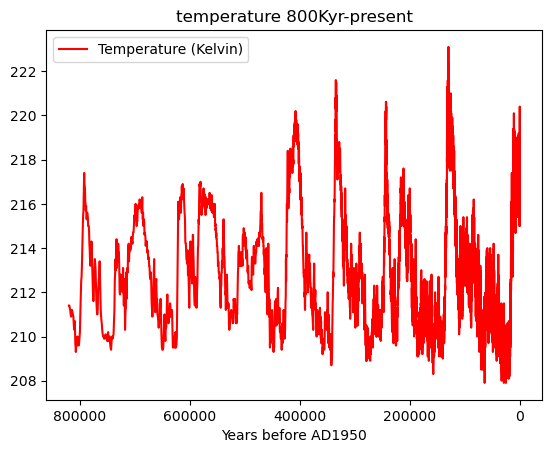

In [15]:
# Plotting all variables and inverting x axis (Stackoverflow.com)
df2.plot(x='Years before AD1950', y='Temperature (Kelvin)', title='temperature 800Kyr-present', color='r').invert_xaxis();

Creating a variable which contains both temperature & Co2 data.

In [16]:
# Merging datasets together (Python for MBAs)
df_fused = pd.merge(df1, 
                    df2,
                    left_on='Years before AD1950',
                    right_on='Years before AD1950',
                    how='outer')

[1]

Below is a plot with both Co2 and temperature data on the one graph.

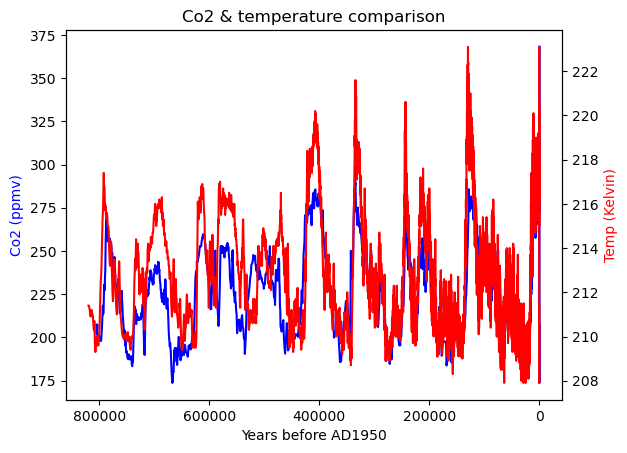

In [17]:
# Plot containing Co2 & temperature data (Datacamp.com & Stackoverflow)
fig, ax = plt.subplots()
ax.plot(df1, df1['Co2 levels'], color='blue')
ax.set_xlabel('Years before AD1950')
ax.set_ylabel('Co2 (ppmv)', color='blue')
ax2 = ax.twinx()
ax2.plot(df2, df2['Temperature (Kelvin)'], color='red')
ax2.set_ylabel('Temp (Kelvin)', color='red')
plt.title('Co2 & temperature comparison')
plt.gca().invert_xaxis()
plt.show()

[11] & [12]

As we can see above, 

The one other feature that I will be investigating as part of this project will be polar ice coverage. I will do so by plotting data that I have located online [7] & [8]. 

In [18]:
# Reading in ice dataset that I found online
df_ice_mass_loss = pd.read_csv("data\cumulative-ice-mass-loss-and.csv")

[7]

In [19]:
# Dropping columns
df_ice_mass_loss.drop(['Cumulative ice mass loss (Greenland):number', 'Greenland Cumulative ice mass loss:number','Greenland Lower bound:number',
                       'Greenland Upper bound:number', 'Antarctic Cumulative mass loss uncertanty:number', 
                       'Antarctic Lower bound:number', 'Antarctic Upper bound:number'], axis=1, inplace=True)

In [20]:
# Removing numbers after decimal point (Geeksforgeeks.com)
year = df_ice_mass_loss['Year:number']

lst = [] 
for each in year: 
    lst.append(str(each).split('.')[0]) 
  
# Converting to integers
final_list = [int(i) for i in lst]

[9]

In [21]:
# Adding in new column
df_ice_mass_loss.insert(1, 'Year', final_list)

In [22]:
# Dropping original column
df_ice_mass_loss.drop('Year:number', axis=1, inplace=True)

In [23]:
# Assigning Year column to datetime format
pd.to_datetime(df_ice_mass_loss['Year'], format='%Y');

[10]

In [24]:
# Adding column names
df_ice_mass_loss.columns = ['Year', 'Cumulative ice mass loss (Antarctica)']

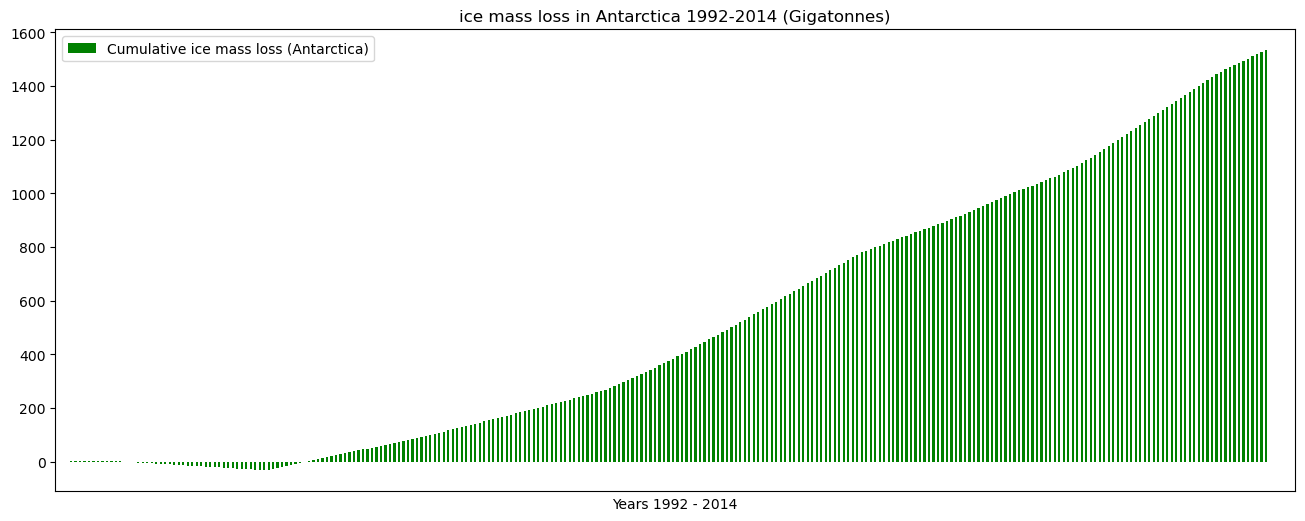

In [25]:
# Plotting all variables as bar chart (Stackoverflow.com)
df_ice_mass_loss.plot(x='Year', y='Cumulative ice mass loss (Antarctica)', 
                      title='ice mass loss in Antarctica 1992-2014 (Gigatonnes)', color='g', kind='bar', xticks=[], 
                      xlabel='Years 1992 - 2014', figsize=(16,6));

[13]

As we can see in the above plot, between 1992 & 2014 there has been a massive loss of ice in Antarctica, almost 1600 Gigatonnes lost in Antarctica alone. 

1992 was only 32 years ago and when we compare the rate of loss, this is highly concerning as we are all aware that the more polar ice that melts, the higher the sea levels and all other consequences that come with this massive change to the amount of water on our planet.


This dataset also provides data for loss of ice mass in Greenland, which I  have not plotted, as I am only investigating polar ice loss however shows an even greater disappearance of ice.

Below, I am going to investigate another dataset.

In [26]:
# Reading in another ice dataset that I found online
df_sea_ice = pd.read_csv("data\Sea_Ice_Index_Monthly_Data_by_Year.csv")

[8]

In [27]:
#Dropping NaN column
df_sea_ice.drop('Unnamed: 13', axis=1, inplace=True)

In [28]:
# Assigning Year column to datetime format
pd.to_datetime(df_sea_ice['Year'], format='%Y');

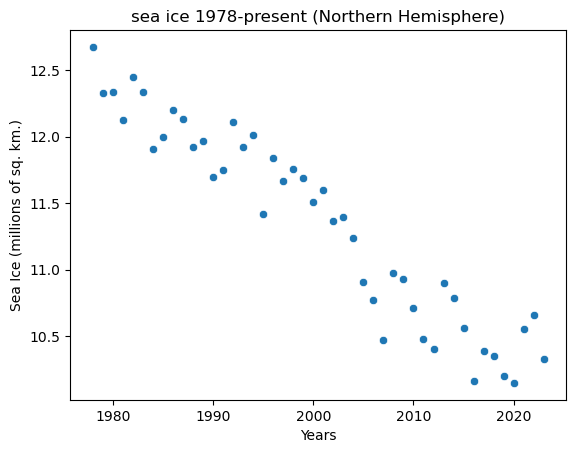

In [29]:
# Scatterplot of data
ax = sns.scatterplot(df_sea_ice, x='Year', y='Annual')
ax.set(xlabel='Years', ylabel='Sea Ice (millions of sq. km.)', title='sea ice 1978-present (Northern Hemisphere)');

As we can see from the above dataset of sea ice in the Northern Hemisphere (NH), there is also a great loss in millions of square kilometres (msk). In 1978, there was 12.328 msk of sea ice compared to 2023, when there was only 10.327 msk. 

Considering we are speaking about **millions** of square kilometres, that is a massive loss of sea ice. I can only imagine ehat this might mean for the species that live in these areas in the NH. That is a massive loss of habitat for them and will contribute majorly to their decline in numbers and possibly even exctinction if this rate of decline continues.

For the Irish context, I read: 

"The emergence of a climate change signal in long-term Irish meteorological observations" (https://www.sciencedirect.com/science/article/pii/S2212094723000610#bib13) 

I have also dowloaded the long-term dataset for Markree (in my home County of Sligo) from met.ie [14] in order to see what temperature anomolies there are when comparing almost 200 yeras worth of data for our small island.

In [30]:
# Reading in dataset that I found online
df_markree = pd.read_csv("data\Markree_1850-1968.csv")

In [31]:
# Assigning Year & Month as ints
df_markree.Year.astype('int32');
df_markree.Month.astype('int32');

In [32]:
# Assigning Year & Month column to datetime format (Stackoverflow.com)
pd.to_datetime(df_markree.Year, format='%Y');
pd.to_datetime(df_markree.Month, format='%m');
pd.to_datetime(df_markree.Day, format='%d');

[14]

In [33]:
# Dropping NA data
df_markree.dropna(inplace=True)

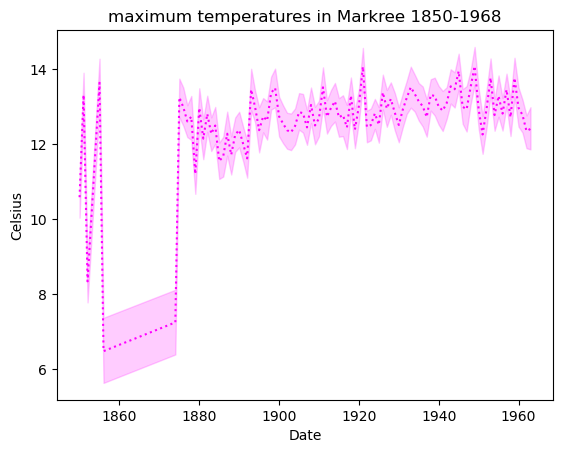

In [34]:
# Plotting temperature data for Ireland in seaborn
sns.lineplot(data=df_markree, x='Year', y='Max (C)', 
             markers=True, color='magenta', linestyle='dotted').set(title='maximum temperatures in Markree 1850-1968', 
                                                xlabel='Date', ylabel='Celsius');

As we can see there is a drop out in data around 1860 due to some NA rows but if we exclude this, there seems to be a pretty standaard high and low in max temperatures each year representing the season comparison between Winter & Summer months.

Let's now look at just the data for July of each year.

In [35]:
# Creating a new variable for just July (Stackoverflow.com)
df_july = df_markree[(df_markree['Month'] == 7) & (df_markree['Day'] == 1)]

[15]

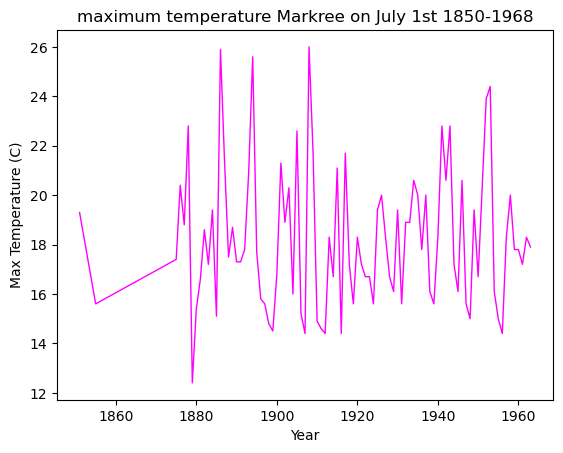

In [36]:
# Plotting temperature data for just July (Stackoverflow.com)
sns.lineplot(data=df_july, x='Year', y='Max (C)', color='magenta', linewidth=1)
plt.title('maximum temperature Markree on July 1st 1850-1968')
plt.xlabel('Year')
plt.ylabel('Max Temperature (C)');

[16]

As we can see above, when we take the data for just the 1st of July every year, the maximum temperature fluctuates greatly from about 12C to amost 26C. The two highest recorded temperatures being around 1885 & 1908.

We will now look at more recent datasets for the Sligo area (after 1968).

In [37]:
# Reading in dataset that I found online
df_sligo_airport = pd.read_csv("data\Sligo_Airport_Temps.csv", skiprows=13)

In [38]:
# Converting date row to datetime
df_sligo_airport['date'] = pd.to_datetime(df_sligo_airport['date'])

In [39]:
# Creating a new variable for just July again (Pynative & Stackoverflow.com)
start_date = datetime.strptime("1988-07-01", "%Y-%m-%d")
july_list = pd.date_range(start_date, periods=31, freq='AS-JUL')

[17] & [18]

In [40]:
# Filtering dataset against july_list variable
df_sligo_filtered = df_sligo_airport[df_sligo_airport['date'].isin(july_list)]

In [41]:
# Dropping empty rows (Shanelynn.ie)
df_sligo_filtered = df_sligo_filtered.drop(labels=0, axis=0)
df_sligo_filtered = df_sligo_filtered.drop(labels=365, axis=0)
df_sligo_filtered = df_sligo_filtered.drop(labels=730, axis=0)
df_sligo_filtered = df_sligo_filtered.drop(labels=1826, axis=0)
df_sligo_filtered = df_sligo_filtered.drop(labels=5934, axis=0)

[19]

In [42]:
# Assigning maxt column as float (Sparkbyexamples.com)
df_sligo_filtered['maxt'] = df_sligo_filtered['maxt'].astype(float) 

[20]

In [43]:
# Assigning Year & Month column to datetime format (Stackoverflow.com)
pd.to_datetime(df_markree.Year, format='%Y');
pd.to_datetime(df_markree.Month, format='%m');

In [44]:
# Assigning maxt column as float (Sparkbyexamples.com)
df_sligo_filtered['maxt'] = df_sligo_filtered['maxt'].astype(float) 

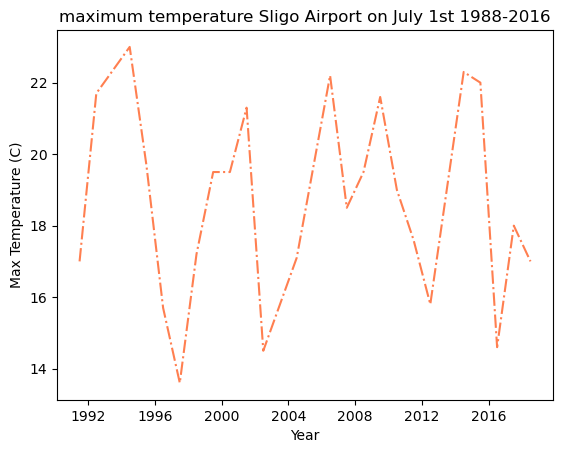

In [45]:
# Plotting temperature data for Sligo Airport
sns.lineplot(data=df_sligo_filtered, x='date', y='maxt', color='coral', linestyle='dashdot')
plt.title('maximum temperature Sligo Airport on July 1st 1988-2016')
plt.xlabel('Year')
plt.ylabel('Max Temperature (C)');

When we take the data for just the 1st of July every year for 1988-2016, the maximum temperature fluctuates the same way as in the previous plot from 1850-1968. This time the temperatures are fluctuating from about 14C to approximately 23C.

I will now provide one more plot for even more recent data for the Markree area of Sligo.

In [46]:
# Reading in dataset that I found online
df_markree_recent = pd.read_csv("data\Markree_Recent_Temps.csv", skiprows=19)

In [47]:
# Assigning maxt column as float (Sparkbyexamples.com)
df_markree_recent['maxtp'] = df_markree_recent['maxtp'].astype(int) 

In [48]:
# Creating a new variable for just July
df_july_recent = df_markree_recent[(df_markree_recent['month'] == 7)]

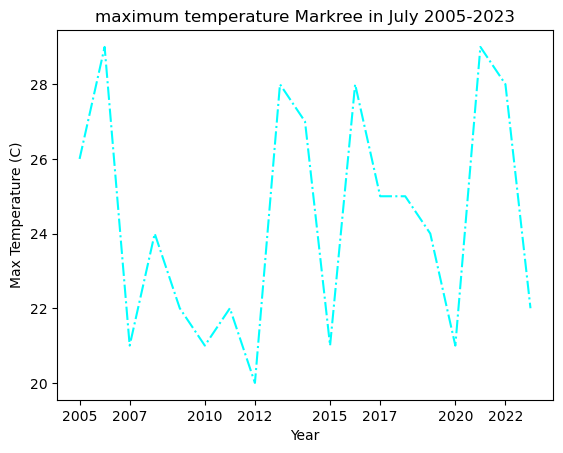

In [62]:
# Plotting temperature data for recent Markree data
sns.lineplot(data=df_july_recent, x='year', y='maxtp', color='aqua', linestyle='dashdot')
plt.title('maximum temperature Markree in July 2005-2023')
plt.xlabel('Year')
plt.xticks([2005, 2007, 2010, 2012, 2015, 2017, 2020, 2022])
plt.ylabel('Max Temperature (C)');

As we can see on the more recent data, July is now seeing a higher max temperature compared to preious years of 29C. The lowest max temperature of 20C is also way higher that the long term datasets lowest point, which was 12C.

I believe that the data I am investigating above shows us that for Ireland (and specifically Sligo alone), we are seeing a great increase in air temperatures compared to a couple hundres years ago. Considering that Co2 data that we have plotted at the very beginning is for 800,000 years, the vast changes we see in not even 300 years worth of data does not bode well for how quickly our planet is warming.

I have fused the Jouzel and Luthi et. al. (temperature & Co2) data to a variable called df_fused and will export that to csv and JSON formats.

Below, I  will predict global temperature anomaly for the next few decades as best I can and will compare my findings to current published data.

### Conclusion
***

### References

[1] Python for MBAs, Griffel & Guetta, Columbia Business School Publishing, 2021, eBook Academic Collection (EBSCOhost), (https://web.s.ebscohost.com/ehost/ebookviewer/ebook/ZTAwMHh3d19fMjQ1ODcyM19fQU41?sid=9d53254f-59d9-4f57-baa5-1b1ed8837cce@redis&vid=3&format=EB), chapter 7.6 JOINS IN PANDAS, last accessed 20/12/23

[2] The EDC3 chronology for the EPICA Dome C icecore, F.Parrenin et. al., 2007 (https://cp.copernicus.org/articles/3/485/2007/cp-3-485-2007.pdf), last accessed 20/12/23

[3] Geeksforgeeks.com, (https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/), last accessed 20/12/23

[4] Stackoverflow.com, (https://stackoverflow.com/questions/28837123/pyplot-reverse-x-axis-and-reverse-table-subplot), last accessed 22/12/23

[5] Pythonguides.com, (https://pythonguides.com/matplotlib-tick-params/), last accessed 22/12/23

[6] Stackoverflow.com, (https://stackoverflow.com/questions/26045779/how-to-turn-all-numbers-in-a-list-into-their-negative-counterparts),  last accessed 22/12/23

[9] Geeksforgeeks.com, (https://www.geeksforgeeks.org/how-to-remove-all-decimals-from-a-number-using-python/), last accessed 29/12/23

[10] Saturncloud.io, (https://saturncloud.io/blog/converting-object-column-in-pandas-dataframe-to-datetime-a-data-scientists-guide/#:~:text=To%20convert%20this%20column%20to,to_datetime()%20method.&text=In%20this%20example%2C%20we%20used,'%20)%2C%20and%20the%20pd.), last accessed 29/12/23

[11] Datacamp.com, (https://campus.datacamp.com/courses/introduction-to-data-visualization-with-matplotlib/plotting-time-series?ex=5#:~:text=Using%20twin%20axes,-00%3A00%20%2D%2000&text=Again%2C%20we%20start%20by%20adding,object%20and%20show%20the%20figure.), last accessed 04/01/23

[12] Stackoverflow.com, (https://stackoverflow.com/questions/2051744/how-to-invert-the-x-or-y-axis), last accessed 04/01/23

[13] Stackoverflow.com, (https://stackoverflow.com/questions/40705614/hide-axis-label-only-not-entire-axis-in-pandas-plot), last accessed 06/01/24

[14] Stackoverflow.com, (https://stackoverflow.com/questions/46658232/pandas-convert-column-with-year-integer-to-datetime), last accessed 07/01/24

[15] Stackoverflow.com, (https://stackoverflow.com/questions/68460147/select-rows-of-specific-months-in-pandas-dataframe), last accessed 07/01/24

[16] Stackoverflow.com, (https://stackoverflow.com/questions/58432235/changing-color-of-seaborn-plot-line), last accessed 08/01/24

[17] Pynative.com, (https://pynative.com/python-create-list-of-dates-within-range/), last accessed 08/01/24

[18] Stackoverflow.com, (https://stackoverflow.com/questions/32168848/how-to-create-a-pandas-datetimeindex-with-year-as-frequency), last accessed 08/01/24

[19] Shanelynn.ie, (https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/), last accessed 08/01/24

[20] Sparkbyexamples.com, (https://sparkbyexamples.com/pandas/pandas-convert-string-to-float-type-dataframe/), last accessed 08/01/24

### Datasets

[7] European Environment Agency, [cumulative-ice-mass-loss-and.csv] (https://www.eea.europa.eu/data-and-maps/daviz/cumulative-ice-mass-loss-and#tab-dashboard-01), last accessed 27/12/23

[8] NOAA, [Sea_Ice_Index_Monthly_Data_by_Year.csv] (https://noaadata.apps.nsidc.org/NOAA/G02135/seaice_analysis/), Last accessed 27/12/23

[14] Mateus, C.; Potito, A.; Curley, M. 2020. "Reconstruction of a long-term historical daily maximum and minimum air temperature network dataset for Ireland (1831-1968)." Geoscience Data Journal. http://dx.doi.org/10.1002/gdj3.92, (https://www.met.ie/climate/available-data/long-term-data-sets/), last accessed 06/01/24

***
## The End